In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import requests
import time
import re

In [3]:
#####1. 데이터 수집######

# 수집기간1(팬데믹: 2022.12.)
columns_to_read = ['언론사', 'URL']
df = pd.read_excel('NewsResult_20221201-20221231.xlsx', usecols=columns_to_read)

result_dict = df.groupby('언론사')['URL'].agg(list).to_dict()

joongang_list = []
hankyure_list = []
kyunghyang_list = []
donga_list = []

# 1) 중앙일보 기사

df_joongang = pd.DataFrame(result_dict['중앙일보'], columns=['url'])
for joongang_url in df_joongang['url']:
    r = requests.get(joongang_url)
    soup = BeautifulSoup(r.text, 'lxml')
    article_body = soup.find('div', attrs = {'id':'article_body'}).find_all('p')
    article_text = [elem.get_text() for elem in article_body]
    article_text = ' '.join(article_text)

    # 기자 이메일 주소 이후 본문 제거
    result = re.search(r"^(.*?)([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}|$)", article_text, re.DOTALL)
    if result:
        txt_remove_email = result.group(1)
        joongang_list.append(txt_remove_email)
    else:
        joongang_list.append('None') ##### txt가 정의되어있어서 에러가 발생할 수도 있음
        
    time.sleep(2)

df_joongang['result'] = joongang_list
df_joongang.to_excel("joongang.xlsx")

# 2) 한겨레 기사
  
for hankyure_url in result_dict['한겨레']:
    r = requests.get(hankyure_url)
    soup = BeautifulSoup(r.text, 'lxml')
    article_text = ' '.join(soup.find('div', attrs={'class':'article-text'}).text.split())

    # 기자 이메일 주소 이후 본문 제거
    result = re.search(r"^(.*?)([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}|$)", article_text, re.DOTALL)
    if result:
        txt_remove_email = result.group(1)
        hankyure_list.append(txt_remove_email)
    else:
        hankyure_list.append(article_text)
        
    time.sleep(2)

# 3) 경향신문 기사

# requests forbidden 문제 해결 코드
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}
session = requests.Session()
session.headers.update(headers)

for kyunghyang_url in result_dict['경향신문']:
    response = session.get(kyunghyang_url)

    soup = BeautifulSoup(response.text, 'lxml')
    article_body = soup.find('div', attrs = {'class':'art_body'}).find_all('p')
    article_text = [elem.get_text() for elem in article_body]
    article_text = ' '.join(article_text)
    
    # 기자 이메일 주소 이후 본문 제거
    result = re.search(r"^(.*?)([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}|$)", article_text, re.DOTALL)
    if result:
        txt_remove_email = result.group(1)
        kyunghyang_list.append(txt_remove_email)
    else:
        kyunghyang_list.append(article_text)
    
    time.sleep(2)

# 4) 동아일보 기사
    
for donga_url in result_dict['동아일보']:
    r = requests.get(donga_url)
    soup = BeautifulSoup(r.text, 'lxml')
    article_text = soup.find('div', attrs = {'id':'article_txt'}).text

   # 기자 이메일 주소 이후 본문 제거
    result = re.search(r"^(.*?)([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}|$)", article_text, re.DOTALL)
    if result:
        txt_remove_email = result.group(1)
        donga_list.append(txt_remove_email)
    else:
        donga_list.append(article_text)
        
    time.sleep(2)

C:\Users\JUNG\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
# 수집기간2(엔데믹: 2023.7)
columns_to_read = ['언론사', 'URL']
df = pd.read_excel('NewsResult_20230701-20230731.xlsx', usecols=columns_to_read)

result_dict = df.groupby('언론사')['URL'].agg(list).to_dict()

joongang_list_postcovid = []
hankyure_list_postcovid = []
kyunghyang_list_postcovid = []
donga_list_postcovid = []

# 1) 중앙일보 기사

for joongang_url in result_dict['중앙일보']:
    r = requests.get(joongang_url)
    soup = BeautifulSoup(r.text, 'lxml')
    article_body = soup.find('div', attrs = {'id':'article_body'}).find_all('p')
    article_text = [elem.get_text() for elem in article_body]
    article_text = ' '.join(article_text)

    # 기자 이메일 주소 이후 본문 제거
    result = re.search(r"^(.*?)([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}|$)", article_text, re.DOTALL)
    if result:
        txt_remove_email = result.group(1)
        joongang_list_postcovid.append(txt_remove_email)
    else:
        joongang_list_postcovid.append(txt)
        
    time.sleep(2)

# 2) 한겨레 기사

for hankyure_url in result_dict['한겨레']:
    r = requests.get(hankyure_url)
    soup = BeautifulSoup(r.text, 'lxml')
    article_text = ' '.join(soup.find('div', attrs={'class':'article-text'}).text.split())

    # 기자 이메일 주소 이후 본문 제거
    result = re.search(r"^(.*?)([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}|$)", article_text, re.DOTALL)
    if result:
        txt_remove_email = result.group(1)
        hankyure_list_postcovid.append(txt_remove_email)
    else:
        hankyure_list_postcovid.append(article_text)
        
    time.sleep(2)

# 3) 경향신문 기사

# requests forbidden 문제 해결 코드
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}
session = requests.Session()
session.headers.update(headers)

for kyunghyang_url in result_dict['경향신문']:
    response = session.get(kyunghyang_url)

    soup = BeautifulSoup(response.text, 'lxml')
    article_body = soup.find('div', attrs = {'class':'art_body'}).find_all('p')
    article_text = [elem.get_text() for elem in article_body]
    article_text = ' '.join(article_text)
    
    # 기자 이메일 주소 이후 본문 제거
    result = re.search(r"^(.*?)([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}|$)", article_text, re.DOTALL)
    if result:
        txt_remove_email = result.group(1)
        kyunghyang_list_postcovid.append(txt_remove_email)
    else:
        kyunghyang_list_postcovid.append(article_text)
    
    time.sleep(2)

# 4) 동아일보 기사
    
for donga_url in result_dict['동아일보']:
    r = requests.get(donga_url)
    soup = BeautifulSoup(r.text, 'lxml')
    article_text = soup.find('div', attrs = {'id':'article_txt'}).text

   # 기자 이메일 주소 이후 본문 제거
    result = re.search(r"^(.*?)([a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}|$)", article_text, re.DOTALL)
    if result:
        txt_remove_email = result.group(1)
        donga_list_postcovid.append(txt_remove_email)
    else:
        donga_list_postcovid.append(article_text)
        
    time.sleep(2)

C:\Users\JUNG\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [5]:
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords
import re
from collections import Counter

In [6]:
##### 2. 한글 전처리######

kiwi = Kiwi()
stopwords_dict = Stopwords()

# 불용어 사용자 정의

customized_stopwords = ['올해', '지난해', '내년', '이후', '기자', '사진', '코로나']
for word in customized_stopwords:
    stopwords_dict.add((word, 'NNG')) 
    
customized_stopwords = ['코로나', '연합뉴스', '중앙일보', '동아일보', '한겨레', '경향신문']
for word in customized_stopwords:
    stopwords_dict.add((word, 'NNP'))

In [46]:
def list_to_string(media_list):
    media_string =' '.join(media_list) # Q> 추후 네트워크분석에서 문제 발생... 기사별 preprocessing 리스트형태로 저장할 수 있을까?
    return media_string

In [ ]:
df_joongang = pd.read_excel('joongang.xlsx')
joongang_list = df_joongang['result']

In [47]:
j1_string = list_to_string(joongang_list) #중앙일보 팬데믹
j2_string = list_to_string(joongang_list_postcovid) #중아일보 엔데믹
d1_string = list_to_string(donga_list) #동아일보 팬데믹
d2_string = list_to_string(donga_list_postcovid) #동아일보 엔데믹
h1_string = list_to_string(hankyure_list) #한겨레 팬데믹
h2_string = list_to_string(hankyure_list_postcovid) #한겨레 엔데믹
k1_string = list_to_string(kyunghyang_list) #경향신문 팬데믹
k2_string = list_to_string(kyunghyang_list_postcovid) #경향신문 엔데믹
con1_string = list_to_string(joongang_list+donga_list) #보수성향 신문 팬데믹
con2_string = list_to_string(joongang_list_postcovid+donga_list_postcovid) #보수성향 신문 엔데믹
lib1_string = list_to_string(hankyure_list+kyunghyang_list) #진보성향 신문 팬데믹
lib2_string = list_to_string(hankyure_list_postcovid+kyunghyang_list_postcovid) #진보성향 신문 엔데믹

In [48]:
def preprocessing(media_string):
        
    filtered_content = re.sub(r'[^\s\w\d]', '', media_string)
    kiwi_tokens = kiwi.tokenize(filtered_content, stopwords = stopwords_dict) 
    noun_words = []
    for token in kiwi_tokens:
        if 'NN' in token.tag:
            noun_words.append(token.form)
        
    final_noun_words = []
    for word in noun_words:
        if len(word) > 1:
            final_noun_words.append(word)
        
    return final_noun_words

In [49]:
def get_words(counter_results):
    words = []
    for word, fre in counter_results:
        words.append(word)
    return words

In [50]:
def select_words(K, media_string):
    c = Counter(preprocessing(media_string))
    selected_words = get_words(c.most_common(K))
    return selected_words

In [51]:
#### 3.빈도 분석 ####

# 1) 매체별 상위10개 키워드 분석
# Q> 표로 추출해서 볼 수 있을까?

j1_w = select_words(10, j1_string)
j2_w = select_words(10, j2_string)
d1_w = select_words(10, d1_string)
d2_w = select_words(10, d2_string)
h1_w = select_words(10, h1_string)
h2_w = select_words(10, h2_string)
k1_w = select_words(10, k1_string)
k2_w = select_words(10, k2_string)
con1_w = select_words(10, con1_string)
con2_w = select_words(10, con2_string)
lib1_w = select_words(10, lib1_string)
lib2_w = select_words(10, lib2_string)

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [52]:
# 2) 워드클라우드

def wordcloud(media_string):
    final_noun_words = preprocessing(media_string)
    cleaned_words =' '.join(final_noun_words)
    wc = WordCloud(font_path='malgun', background_color='white', repeat=True) 
    wc.generate(cleaned_words)
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.show()
    wc.to_file(i+'.png') # Q > 함수에 투입하는 데이터별로 파일명 따로 지정하는 방법이 있을까?

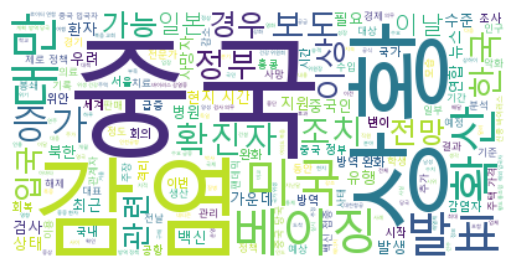

NameError: name 'name' is not defined

In [55]:
wordcloud(j1_string)

In [37]:
#### 4. 네트워크 분석 ####

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import networkx as nx
def construct_network(text):
    vectorizer = CountVectorizer(min_df=1, ngram_range=(1,1))
    DTM_tf = vectorizer.fit_transform(text)
    feature_names = vectorizer.get_feature_names_out()
    DTM = np.array(DTM_tf.todense())
    DTM_binary = np.sign(DTM)
    words_cooccurrence = np.dot(DTM_binary.T, DTM_binary)
    np.fill_diagonal(words_cooccurrence, 0)
    #print(feature_names) # 네트워크를 구성하는 단어 출력하기
    #print(words_cooccurrence) # 단어들 간의 인접행렬 출력하기
    g = nx.convert_matrix.from_numpy_array(words_cooccurrence)
    mapping = {}
    for k, word in enumerate(feature_names):
        mapping[k]=word
    g1 = nx.relabel_nodes(g, mapping)
    return g1

In [64]:
def get_text_network(media_list, selected_words):
    cleaned_articles = [preprocessing(article) for article in media_list] # Q> 오류. expected string or bytes-like object, got 'list'
    new_docs=[]
    for article in cleaned_articles:
        new_doc=[]
        for word in article:
            if word in selected_words:
                new_doc.append(word)
        if len(new_doc)>1:
            new_docs.append(' '.join(new_doc))
    return construct_network(new_docs)

In [65]:
j1_nw = get_text_network(joongang_list, j1_w)

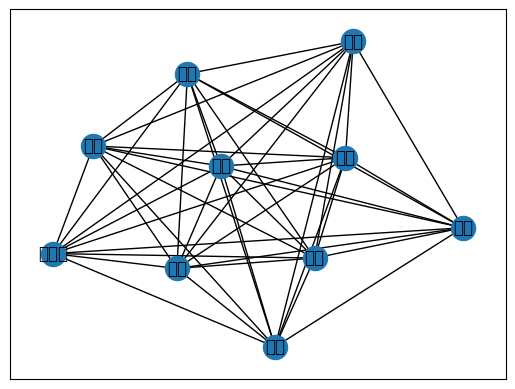

In [67]:
import matplotlib.pyplot as plt 
nx.draw_networkx(j1_nw)
plt.show()
nx.write_graphml(j1_nw, '중앙일보 팬데믹.graphml') #Networkx에 제공하는 graphml 파일확장자로 저장